In [1]:
## References:
## https://blog.techbridge.cc/2018/10/05/how-to-use-python-manipulate-excel-spreadsheet/
from openpyxl import load_workbook

wb = load_workbook('tune.xlsx')
print(wb.sheetnames)

['plotting', 'ablation', 'new_baseline', 'sensitivity_analysis', 'new_result', 'baseline', 'tuning', 'Sheet4', 'Sheet3', 'Sheet2', 'Sheet1']


In [2]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#### Ploting Result,  sheet name = plotting 

In [9]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'font.family' : 'Cantarell', 'font.weight':'normal',"mathtext.fontset":'stix' })
def getSubGraph(ax1, label_mapping,caption,name,task="Whole missing",enable_y_label=False, enable_legend=False,table='A5:J12',mytype="Cora",x_axis_name="missing rate",legend_loc='lower left'):
    #name = "pubmed"
    #ws = wb[name]
    ws = wb[name]
    missing_rate = ws[table]
    rows = len(missing_rate)
    cols = len(missing_rate[0])
    print(rows, cols)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        x_axis.append(missing_rate[0][i].value)
    for i in range(1, rows, 1):
        label_axis.append(missing_rate[label_mapping[i]][0].value)
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(missing_rate[label_mapping[i]][j].value)
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    #color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    color = ["#8c564b","#7f7f7f", GREEN,BLUE,PURPLE,LIGHTBLUE,"#e377c2",DARKYELLO, "#ff7f0e", "#d62728", "#9467bd", "#bcbd22", RED, "#1f77b4","#17becf",  "#2ca02c"]
    marker = [",",",","d","^","v","<",">","1","+","*"]
    alpha = [0.9] * 10
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        if i ==0:
            line, = ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], linestyle="--" )
            #line.set_dashes((40,5,5,5,5,5))
        else:
            ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

    if enable_y_label: 
        ax1.set_ylabel("Accuracy")
    ax1.set_title("{}".format(caption))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)



11 10
11 10
11 10


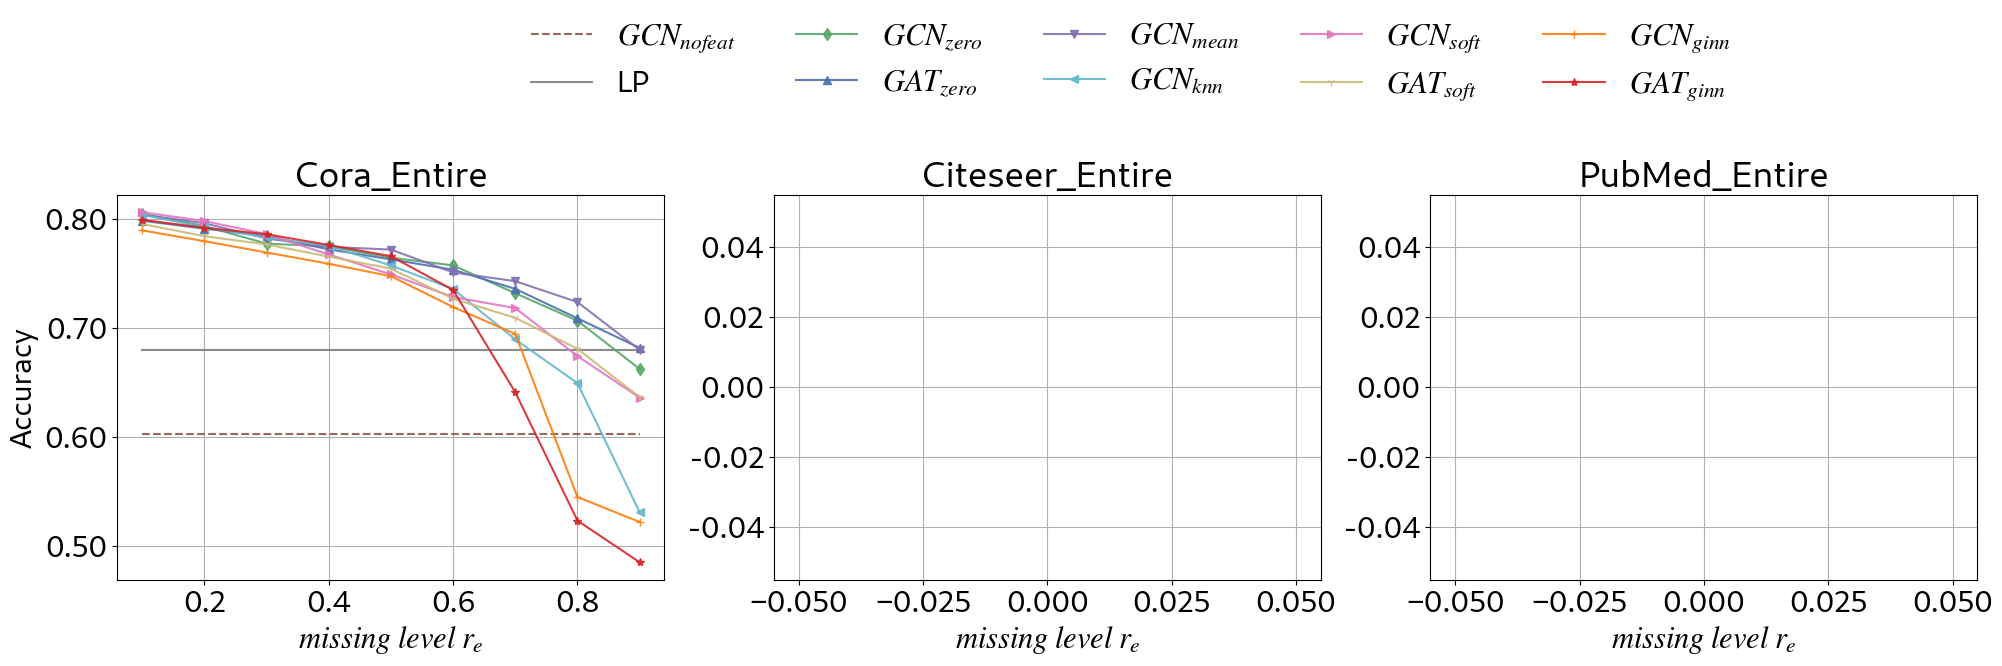

In [10]:
### Other Noise
task = "Whole missing"
name =  "plotting"
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7,
    8:8,
    9:9,
    10:10
}

fignum = 3

if fignum == 2:
    subplot = [121, 122]
    fig=plt.figure(figsize=(6*2,4*1))
elif fignum == 3:
    subplot = [131, 132, 133]
    fig=plt.figure(figsize=(8*3,5*1))
elif fignum == 4:
    subplot = [141, 142,143, 144]
    fig=plt.figure(figsize=(6*4,4*1))
elif fignum == 5:
    subplot = [151, 152, 153, 154, 155]
    fig=plt.figure(figsize=(6*5,4*1))
elif fignum == 6:
    subplot = [231, 232, 233, 234, 235, 236]
    fig=plt.figure(figsize=(6*3,4*2))
if  task == "Whole missing":
    info = [
        {
            "table":"A4:J14",
            "type":"Cora",
            "x_axis_name":r"$ missing\;level\;r_e$",
            "caption":"Cora_Entire"
        },
        {
            "table":"A23:J33",
            "type":"Citeseer",
            "x_axis_name":r"$missing\;level\;r_e$",
            "caption":"Citeseer_Entire"
        },
        {
            "table":"A42:J52",
            "type":"Pubmed",
            "x_axis_name":r"$missing\;level\;r_e$",
            "caption":"PubMed_Entire"
            
        }
    ]
        
    
elif task == "Partial missing":
    info = [
        {
            "table":"A61:J71",
            "type":"Cora",
            "x_axis_name":r"$missing\;level\;r_p$",
            "caption":"Cora_Partial"
        },
        {
            "table":"A80:J90",
            "type":"Citeseer",
            "x_axis_name":r"$missing\;level\;r_p$",
            "caption":"Citeseer_Partial"
        },
        {
            "table":"A100:J110",
            "type":"Pubmed",
            "x_axis_name":r"$missing\;level\;r_p$",
            "caption":"PubMed_Partial"
            
        }
    ]
# Node Classification
# ['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']
dataset_name = "all"
fig_c = 0
for j in range(len(info)):
    if task == "Whole missing":
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    elif task == "Partial missing":
        if j== 0:
            enableLegend = False
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    mytable = info[j]["table"]
    caption_name = info[j]["caption"]
    ax1=fig.add_subplot(subplot[fig_c])
    getSubGraph(ax1, label_mapping,caption_name,name, task,enable_y_label,table=mytable, 
                mytype=info[j]["type"], x_axis_name=info[j]["x_axis_name"])

    if enableLegend:
        ## fignum = 3
        plt.legend(loc='upper right', bbox_to_anchor=(3, +1.52),
              fancybox=False, shadow=False, ncol=5, frameon=False)
        ## fignum = 2
        #plt.legend(loc='upper right', bbox_to_anchor=(1.85, +1.32),
        #     fancybox=False, shadow=False, ncol=7, frameon=False)
        #plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
        #      fancybox=False, shadow=False, ncol=6, frameon=False)
        #plt.legend(loc='best')
    plt.grid()
    fig_c = fig_c + 1
#plt.show()
#fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.2, hspace =0.5)#调整子图间距
plt.savefig("fig/{}.pdf".format(task),dpi=320, bbox_inches='tight',pad_inches=0.01)#quality=100,

### Sensitivity Analysis

In [5]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'font.family' : 'Garamond', 'font.weight':'normal',"mathtext.fontset":'stix' })
def getSubGraph(ax1, label_mapping,caption,name,task="Whole missing",enable_y_label=False, enable_legend=False,table='A5:J12',mytype="Cora",x_axis_name="missing rate",legend_loc='lower left'):
    #name = "pubmed"
    #ws = wb[name]
    ws = wb[name]
    missing_rate = ws[table]
    rows = len(missing_rate)
    cols = len(missing_rate[0])
    print(rows, cols)
    x_axis = []
    label_axis = []
    y_axis = []
    for i in range(1,cols,1):
        x_axis.append(missing_rate[0][i].value)
    for i in range(1, rows, 1):
        label_axis.append(missing_rate[label_mapping[i]][0].value)
    for i in range(1, rows, 1):
        new_y_axis = []
        for j in range(1, cols, 1):
            new_y_axis.append(missing_rate[label_mapping[i]][j].value)
        y_axis.append(new_y_axis)
    #print(x_axis, label_axis, y_axis)
    lengend_name = label_axis
    ## Blue, 
    BLUE = "#4E70B1"
    GREEN = "#55A768"
    RED = "#C74E51"
    PURPLE = "#8371B3"
    DARKYELLO = "#CCB975"
    LIGHTBLUE = "#63B7CE"
    color = [GREEN,BLUE,PURPLE,LIGHTBLUE,RED,DARKYELLO]
    #color = [  "#ff7f0e", "#d62728", "#9467bd","#1f77b4", "#8c564b","#7f7f7f", "#e377c2",  "#17becf", "#bcbd22","#2ca02c"]
    marker = ["d","^","v","<",">","1","+","*"]
    alpha = [0.9] * 6
    for i in range(len(label_axis)):
        xnew_list = x_axis
        ynew_list = y_axis[i]
        ax1.plot(xnew_list,ynew_list,label=lengend_name[i],color=color[i],alpha=alpha[i], marker=marker[i])
    ax1.set_xlabel(x_axis_name)
    ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

    if enable_y_label: 
        ax1.set_ylabel("Accuracy")
    ax1.set_title("{}".format(caption))
    #ax1.set_ylim(ymin=0, ymax=1) 
    #ax1.set_xbound(0, 600)



7 10


findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


7 10


/import/home/zchencz/.conda/envs/tg/lib/python3.7/site-packages/ipykernel_launcher.py:109: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


"\nlg = plt.legend()\n\nplt.savefig('example.png', \n            dpi=300, \n            format='png', \n             \n            bbox_inches='tight')\n"

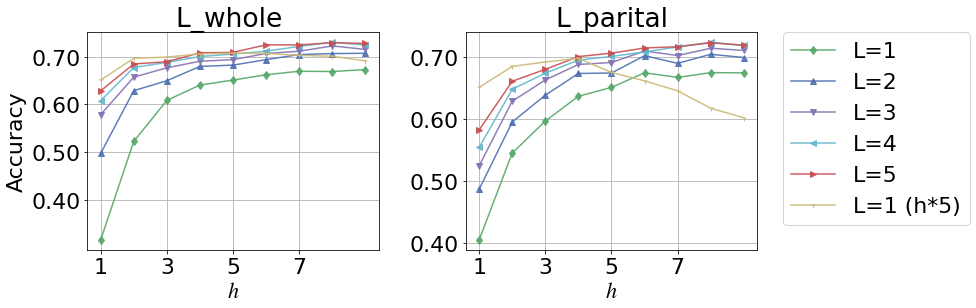

In [5]:
### Other Noise
task = "Sensitivity"
name = 'sensitivity_analysis'
task = "L analysis"
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6
}

fignum = 2
if fignum == 2:
    subplot = [121, 122]
    fig=plt.figure(figsize=(6*2,4*1))
elif fignum == 3:
    subplot = [131, 132, 133]
    fig=plt.figure(figsize=(8*3,5*1))
elif fignum == 4:
    subplot = [141, 142,143, 144]
    fig=plt.figure(figsize=(6*4,4*1))
elif fignum == 5:
    subplot = [151, 152, 153, 154, 155]
    fig=plt.figure(figsize=(6*5,4*1))
elif fignum == 6:
    subplot = [231, 232, 233, 234, 235, 236]
    fig=plt.figure(figsize=(6*3,4*2))
if  task == "L analysis":
    info = [
        {
            "table":"A3:J9",
            "type":"Cora",
            "x_axis_name":r"$h$",
            "caption":"L_whole "#L Analysis for 
        },
        {
            "table":"A12:J18",
            "type":"Citeseer",
            "x_axis_name":r"$h$",
            "caption":"L_parital"#L Analysis for 
        }
    ]
        
    
elif task == "h analysis":
    info = [
        {
            "table":"A29:J34",
            "type":"Pubmed",
            "x_axis_name":r"$L$",
            "caption":"h_whole"
            
        },
        {
            "table":"A22:J27",
            "type":"Pubmed",
            "x_axis_name":r"$L$",
            "caption":"h_partial"
            
        }
    ] 
# Node Classification
# ['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']
dataset_name = "all"
fig_c = 0
for j in range(len(info)):
    if task == "Whole missing":
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    #elif task == "Partial missing":
    else:
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    mytable = info[j]["table"]
    caption_name = info[j]["caption"]
    ax1=fig.add_subplot(subplot[fig_c])
    getSubGraph(ax1, label_mapping,caption_name,name, task,enable_y_label,table=mytable, 
                mytype=info[j]["type"], x_axis_name=info[j]["x_axis_name"])

    if enableLegend:
        ## fignum = 3
        #plt.legend(loc='upper right', bbox_to_anchor=(3.65, +1.32),
        #      fancybox=False, shadow=False, ncol=8, frameon=False)
        ## fignum = 2
        plt.legend(loc='upper right', bbox_to_anchor=(2.85, +1.35),
             fancybox=False, shadow=False, ncol=6, frameon=False)
        #plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
        #      fancybox=False, shadow=False, ncol=6, frameon=False)
        lg = plt.legend(bbox_to_anchor=(2.35, 1.05), loc='upper left')
    my_x_ticks = np.arange(1, 9, 2) 
    plt.xticks(my_x_ticks)
    my_y_ticks = np.arange(0.4, 0.8, 0.1) 
    plt.yticks(my_y_ticks)
    plt.grid()
    fig_c = fig_c + 1
#plt.show()
#fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.3, hspace =0.5)#调整子图间距
plt.savefig("fig/tune_{}.pdf".format(task),dpi=320,quality=100, bbox_extra_artists=(lg,),bbox_inches='tight',pad_inches=0.01)

'''
lg = plt.legend()

plt.savefig('example.png', 
            dpi=300, 
            format='png', 
             
            bbox_inches='tight')
'''

6 10
6 10
7 10


/import/home/zchencz/.conda/envs/tg/lib/python3.7/site-packages/ipykernel_launcher.py:122: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


"\nlg = plt.legend()\n\nplt.savefig('example.png', \n            dpi=300, \n            format='png', \n             \n            bbox_inches='tight')\n"

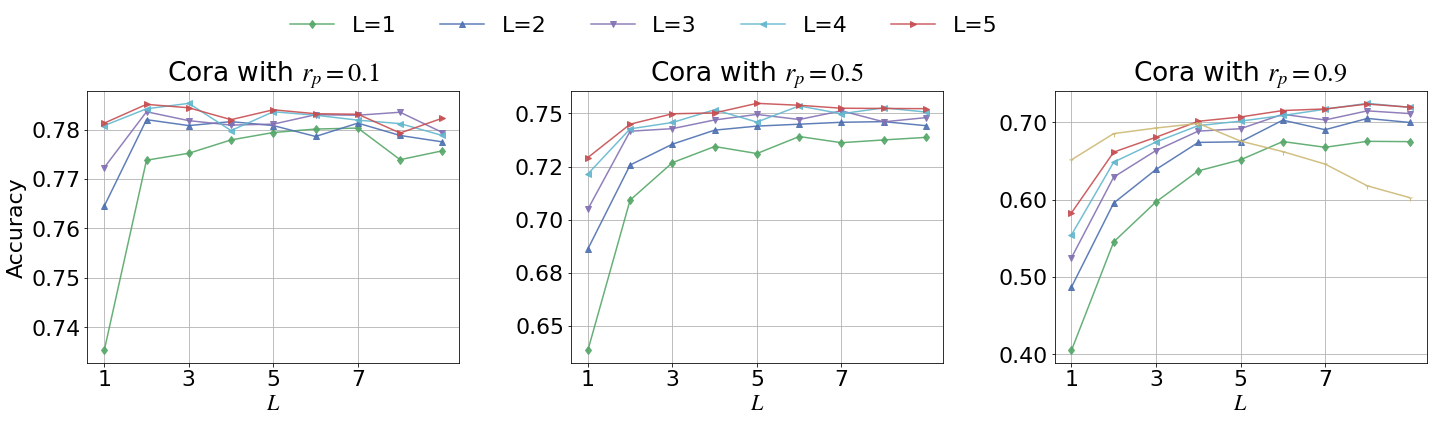

In [9]:
### Other Noise
task = "Sensitivity"
name = 'sensitivity_analysis'
task = "part"
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6
}

fignum = 3
if fignum == 2:
    subplot = [121, 122]
    fig=plt.figure(figsize=(7*2,4*1))
elif fignum == 3:
    subplot = [131, 132, 133]
    fig=plt.figure(figsize=(8*3,5*1))
elif fignum == 4:
    subplot = [141, 142,143, 144]
    fig=plt.figure(figsize=(6*4,4*1))
elif fignum == 5:
    subplot = [151, 152, 153, 154, 155]
    fig=plt.figure(figsize=(6*5,4*1))
elif fignum == 6:
    subplot = [231, 232, 233, 234, 235, 236]
    fig=plt.figure(figsize=(6*3,4*2))
if  task == "whole":
    info = [
        {
            "table":"A61:J66",
            "type":"Cora",
            "x_axis_name":r"$h$",
            "caption":"Cora with $r_e=0.1$ "#L Analysis for 
        },
        {
            "table":"A45:J50",
            "type":"Citeseer",
            "x_axis_name":r"$h$",
            "caption":"Cora with $r_e=0.5$"#L Analysis for 
        },
        {
            "table":"A3:J9",
            "type":"Citeseer",
            "x_axis_name":r"$h$",
            "caption":"Cora with $r_e=0.9$"#L Analysis for 
        }
    ]
        
    
elif task == "part":
    info = [
        {
            "table":"A53:J58",
            "type":"Pubmed",
            "x_axis_name":r"$L$",
            "caption":"Cora with $r_p=0.1$"
            
        },
        {
            "table":"A38:J43",
            "type":"Pubmed",
            "x_axis_name":r"$L$",
            "caption":"Cora with $r_p=0.5$"
            
        },
        {
            "table":"A12:J18",
            "type":"Pubmed",
            "x_axis_name":r"$L$",
            "caption":"Cora with $r_p=0.9$"
            
        }
    ] 
# Node Classification
# ['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']
dataset_name = "all"
fig_c = 0
for j in range(len(info)):
    if task == "Whole missing":
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    #elif task == "Partial missing":
    else:
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    mytable = info[j]["table"]
    caption_name = info[j]["caption"]
    ax1=fig.add_subplot(subplot[fig_c])
    getSubGraph(ax1, label_mapping,caption_name,name, task,enable_y_label,table=mytable, 
                mytype=info[j]["type"], x_axis_name=info[j]["x_axis_name"])

    if enableLegend:
        ## fignum = 3
        #plt.legend(loc='upper right', bbox_to_anchor=(3.65, +1.32),
        #      fancybox=False, shadow=False, ncol=8, frameon=False)
        ## fignum = 2
        plt.legend(loc='upper right', bbox_to_anchor=(2.5, +1.35),
             fancybox=False, shadow=False, ncol=6, frameon=False)
        #plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
        #      fancybox=False, shadow=False, ncol=6, frameon=False)
        #lg = plt.legend(bbox_to_anchor=(2.35, 1.05), loc='upper left')
    my_x_ticks = np.arange(1, 9, 2) 
    plt.xticks(my_x_ticks)
    #my_y_ticks = np.arange(0.4, 0.8, 0.1) 
    #plt.yticks(my_y_ticks)
    plt.grid()
    fig_c = fig_c + 1
#plt.show()
#fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.3, hspace =0.5)#调整子图间距
plt.savefig("fig/tune_{}.pdf".format(task),dpi=320,quality=100,bbox_inches='tight',pad_inches=0.01)#, bbox_extra_artists=(lg,)

'''
lg = plt.legend()

plt.savefig('example.png', 
            dpi=300, 
            format='png', 
             
            bbox_inches='tight')
'''

### Ablation study

6 10


/import/home/zchencz/.conda/envs/tg/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


"\nlg = plt.legend()\n\nplt.savefig('example.png', \n            dpi=300, \n            format='png', \n             \n            bbox_inches='tight')\n"

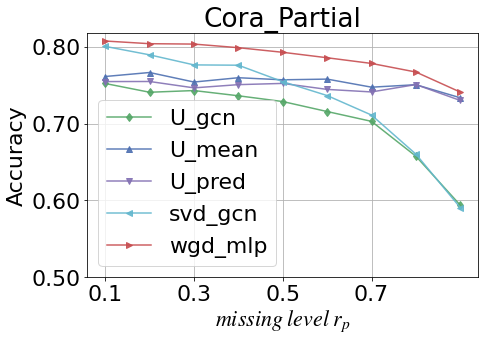

In [6]:
### Other Noise
task = "Ablation"
name = 'ablation'
label_mapping = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6
}

fignum = 1

if fignum == 1:
    subplot = [111]
    fig=plt.figure(figsize=(7*1,4.5*1))
elif fignum == 2:
    subplot = [121, 122]
    fig=plt.figure(figsize=(6*2,4*1))
elif fignum == 3:
    subplot = [131, 132, 133]
    fig=plt.figure(figsize=(8*3,5*1))
elif fignum == 4:
    subplot = [141, 142,143, 144]
    fig=plt.figure(figsize=(6*4,4*1))
elif fignum == 5:
    subplot = [151, 152, 153, 154, 155]
    fig=plt.figure(figsize=(6*5,4*1))
elif fignum == 6:
    subplot = [231, 232, 233, 234, 235, 236]
    fig=plt.figure(figsize=(6*3,4*2))
if  task == "Ablation":
    info = [
        {
            "table":"A2:J7",
            "type":"Cora",
            "x_axis_name":r"$missing \; level\;r_p$",
            "caption":"Cora_Partial"#L Analysis for 
        }
    ]
    
# Node Classification
# ['Cora', 'Citeseer', 'PubMed', 'Comp', 'Photo']
dataset_name = "all"
fig_c = 0
for j in range(len(info)):
    if task == "Whole missing":
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    #elif task == "Partial missing":
    else:
        if j== 0:
            enableLegend = True
            enable_y_label = True
        else:
            enableLegend = False
            enable_y_label = False
    mytable = info[j]["table"]
    caption_name = info[j]["caption"]
    ax1=fig.add_subplot(subplot[fig_c])
    getSubGraph(ax1, label_mapping,caption_name,name, task,enable_y_label,table=mytable, 
                mytype=info[j]["type"], x_axis_name=info[j]["x_axis_name"])

    if enableLegend:
        ## fignum = 3
        #plt.legend(loc='upper right', bbox_to_anchor=(3.65, +1.32),
        #      fancybox=False, shadow=False, ncol=8, frameon=False)
        ## fignum = 2
        plt.legend(loc='upper right', bbox_to_anchor=(2.85, +1.35),
             fancybox=False, shadow=False, ncol=6, frameon=False)
        #plt.legend(loc='upper right', bbox_to_anchor=(3.85, +1.32),
        #      fancybox=False, shadow=False, ncol=6, frameon=False)
        lg = plt.legend( loc='best')#bbox_to_anchor=(0.35, 1.05),
    my_x_ticks = np.arange(0.1, 0.9, 0.2) 
    plt.xticks(my_x_ticks)
    my_y_ticks = np.arange(0.5, 0.9, 0.1) 
    plt.yticks(my_y_ticks)
    plt.grid()
    fig_c = fig_c + 1
#plt.show()
#fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.3, hspace =0.5)#调整子图间距
plt.savefig("fig/{}.pdf".format(task),dpi=320,quality=100, bbox_extra_artists=(lg,),bbox_inches='tight',pad_inches=0.01)

'''
lg = plt.legend()

plt.savefig('example.png', 
            dpi=300, 
            format='png', 
             
            bbox_inches='tight')
'''